In [1]:
import pandas as pd
import os
import glob

In [2]:
business = []
for root, dirs, files in os.walk(r"E:\LDS6\Final\bbc\business"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                business.append(text)

In [3]:
entertainment = []
for root, dirs, files in os.walk(r"E:\LDS6\Final\bbc\entertainment"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                entertainment.append(text)

In [4]:
politics = []
for root, dirs, files in os.walk(r"E:\LDS6\Final\bbc\politics"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                politics.append(text)

In [5]:
sport = []
for root, dirs, files in os.walk(r"E:\LDS6\Final\bbc\sport"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                sport.append(text)

In [6]:
tech = []
for root, dirs, files in os.walk(r"E:\LDS6\Final\bbc\tech"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                tech.append(text)

In [7]:
df1 = pd.DataFrame(business)
df1['class']= 1

In [8]:
df2 = pd.DataFrame(entertainment)
df2['class']= 2

In [9]:
df3 = pd.DataFrame(politics)
df3['class']= 3

In [10]:
df4 = pd.DataFrame(sport)
df4['class']= 4

In [11]:
df5 = pd.DataFrame(tech)
df5['class']= 5

In [12]:
news = pd.concat([df1, df2, df3,df4,df5])

In [13]:
news=news.reset_index()

In [14]:
news=news.drop(['index'], axis = 1)

In [15]:
news.columns = ['content', 'class']

In [16]:
news

,content,class
0,Ad sales boost Time Warner profit\n\nQuarterly...,1
1,Dollar gains on Greenspan speech\n\nThe dollar...,1
2,Yukos unit buyer faces loan claim\n\nThe owner...,1
3,High fuel prices hit BA's profits\n\nBritish A...,1
4,Pernod takeover talk lifts Domecq\n\nShares in...,1
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,5
2221,Spam e-mails tempt net shoppers\n\nComputer us...,5
2222,Be careful how you code\n\nA new European dire...,5
2223,US cyber security chief resigns\n\nThe man mak...,5


In [17]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
for i in ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'hi', 'be']:
    STOPWORDS.add(i)


In [18]:
count = CountVectorizer(stop_words=STOPWORDS)
count.fit(news.content)
bag_of_words = count.transform(news.content)
bag_of_words

<2225x29265 sparse matrix of type '<class 'numpy.int64'>'
	with 347854 stored elements in Compressed Sparse Row format>

In [19]:
X = bag_of_words.toarray()

### K-means

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

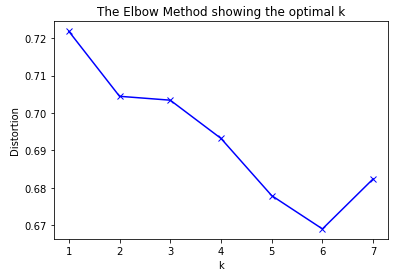

In [22]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cosine'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### choose k = 5

In [23]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [24]:
labels = kmeans.labels_

### Hierarchy Clustering

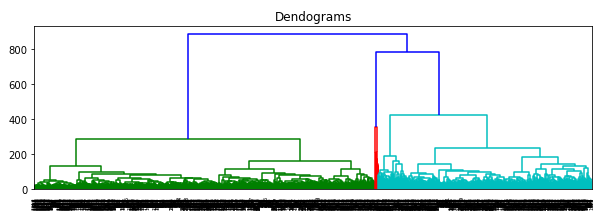

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 3))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

#### Chọn cluster = 5

In [27]:
# from sklearn.cluster import AgglomerativeClustering
# cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
# cluster.fit(X)

### choose k-means model

In [30]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0,    5],
       [   1,   86],
       [   2,  455],
       [   3, 1520],
       [   4,    1],
       [   5,  158]], dtype=int64)

In [31]:
news['label'] = labels

In [32]:
print(list(news['class']).count(1))
print(list(news['class']).count(2))
print(list(news['class']).count(3))
print(list(news['class']).count(4))
print(list(news['class']).count(5))

510
386
417
511
401


In [33]:
def wc(t):
    text = news[news['label']== t]
    text2 = " ".join(a for a in text.content)

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text2)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Wordcloud for predictions of 0


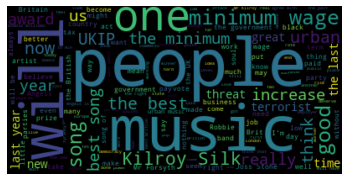

Wordcloud for predictions of 1


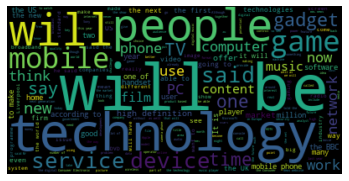

Wordcloud for predictions of 2


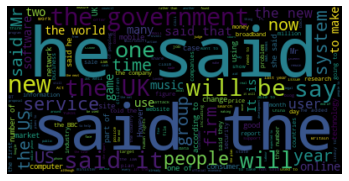

Wordcloud for predictions of 3


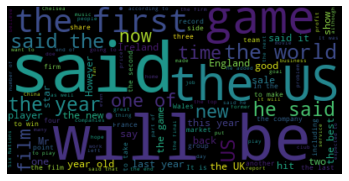

Wordcloud for predictions of 4


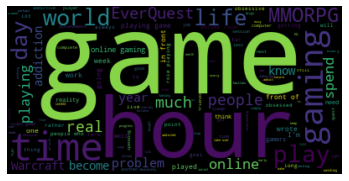

Wordcloud for predictions of 5


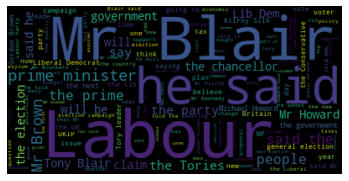

In [34]:
i = 0
while i < 6:
    print('Wordcloud for predictions of', i)
    wc(i)
    i += 1

In [35]:
def wc2(t):
    text = news[news['class']== t]
    text2 = " ".join(a for a in text.content)

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text2)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Wordcloud for class of 1


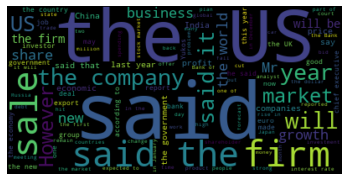

Wordcloud for class of 2


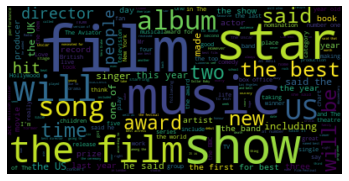

Wordcloud for class of 3


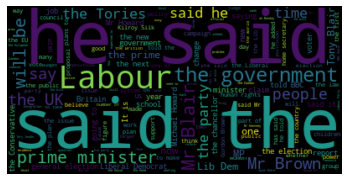

Wordcloud for class of 4


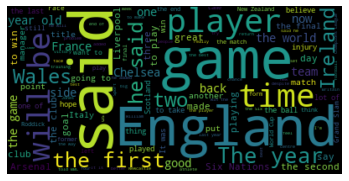

Wordcloud for class of 5


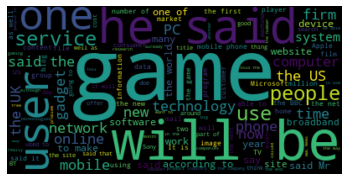

In [36]:
i = 1
while i < 6:
    print('Wordcloud for class of', i)
    wc2(i)
    i += 1